# Glimpse creator for ROI from Radial Analysis

This notebook takes a list of relevant cell IDs over many experiments and positions crops a 'glimpse' of the cell; a series of images lasting the duration of the cells existence that are focused on the cell and it's immediate neighbourhood.

Author: `Nathan J. Day`

In [147]:
import btrack
import matplotlib.pyplot as plt
import os
import shutil
import glob
import json
import sys
sys.path.append('../')
import dataio
from skimage.io import imread, imsave, imshow
from tqdm import tqdm
import numpy as np
from pathlib import Path
from natsort import natsorted
import warnings
warnings.filterwarnings('ignore') ###bc imsave throws up low contrast warnings

# Load dictionary with divisions of interest

In [2]:
with open('/home/nathan/data/results/radial_analysis_output/follow/raw_lists/ROIs/filtered_list_wt_divisions_d0-80_t-240--320.json', 'r') as file:
    divisions = json.load(file)

In [3]:
divisions

{'GV0795_Pos5': {'Scr-16': [[86, 42.46, 443]]},
 'GV0795_Pos7': {'Scr-416': [[455, 59.81, 744]]},
 'GV0796_Pos3': {'Scr-1': [[849, 49.6, 464], [877, 73.42, 470]],
  'Scr-45': [[1130, 62.92, 502]],
  'Scr-52': [[755, 72.47, 518]],
  'Scr-82': [[832, 45.95, 498]]},
 'GV0796_Pos4': {'Scr-321': [[326, 66.42, 399]],
  'Scr-329': [[483, 61.62, 453]],
  'Scr-391': [[617, 56.46, 523]],
  'Scr-450': [[616, 76.03, 543]]},
 'GV0796_Pos6': {'Scr-565': [[276, 79.57, 565]]},
 'GV0796_Pos7': {'Scr-3': [[564, 70.16, 443]],
  'Scr-41': [[287, 51.13, 309]],
  'Scr-394': [[776, 68.74, 551]],
  'Scr-399': [[493, 65.5, 466], [552, 66.77, 451]]},
 'GV0796_Pos20': {'Scr-72': [[641, 44.93, 612]],
  'Scr-95': [[1232, 72.77, 621]]},
 'GV0796_Pos21': {'Scr-252': [[120, 43.23, 298]],
  'Scr-646': [[616, 51.7, 636]]},
 'GV0796_Pos22': {'Scr-11': [[1043, 79.06, 623]],
  'Scr-174': [[142, 69.41, 250]],
  'Scr-324': [[593, 48.19, 445]]},
 'GV0797_Pos7': {'Scr-9': [[2, 58.25, 106]]},
 'GV0797_Pos18': {'Scr-7': [[167, 

# Establish glimpse params

In [158]:
expt_root_folder = '/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/'

size = (100,100) ## sufficient to catch 80 pixels (bin size)
div_duration_x2 = 200

In [5]:
expt = 'GV0795'
pos = 'Pos5'

# steal glimpses from chris heheh

In [128]:
n_mitos, N_mitos = 0, 0
output_dir = '/home/nathan/data/results/radial_analysis_output/ROI_glimpses'
for expt_pos in tqdm(divisions):
    ### get expt and pos IDs
    expt = expt_pos.split('_')[0]
    pos = expt_pos.split('_')[1]
    #print(expt, pos)
    
    ### for every scr cell entry, load list of wt divs
    for scr_ID in divisions[expt_pos]: 
        wts = divisions[expt_pos][scr_ID]
        ### for every wt division get ID and load track and div time
        for wt_entry in wts:
            ### get wt ID
            wt_ID = wt_entry[0]
            N_mitos+=1
            ### set path to premade glimpses
            path_to_premade = os.path.join(expt_root_folder, '{}/{}/{}_aligned/glimpses/mit_glimpses'.format(expt, pos, pos))
            ### see if glimpse already exists
            premade_glimpse_fn = os.path.join(path_to_premade, '{}_{}_{}_GFP_mit.tif'.format(expt, pos, wt_ID))
            if os.path.exists(premade_glimpse_fn):
                print(premade_glimpse_fn)
                n_mitos+=1
                shutil.copyfile(premade_glimpse_fn, os.path.join(output_dir, 'chris_glimpse', '{}_{}_{}_GFP_mit.tif'.format(expt, pos, wt_ID)))


  2%|▏         | 1/53 [00:00<00:08,  5.85it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0795/Pos5/Pos5_aligned/glimpses/mit_glimpses/GV0795_Pos5_86_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0795/Pos7/Pos7_aligned/glimpses/mit_glimpses/GV0795_Pos7_455_GFP_mit.tif


  4%|▍         | 2/53 [00:00<00:08,  6.37it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos3/Pos3_aligned/glimpses/mit_glimpses/GV0796_Pos3_849_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos3/Pos3_aligned/glimpses/mit_glimpses/GV0796_Pos3_877_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos3/Pos3_aligned/glimpses/mit_glimpses/GV0796_Pos3_1130_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos3/Pos3_aligned/glimpses/mit_glimpses/GV0796_Pos3_755_GFP_mit.tif


  6%|▌         | 3/53 [00:00<00:16,  3.01it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos3/Pos3_aligned/glimpses/mit_glimpses/GV0796_Pos3_832_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos4/Pos4_aligned/glimpses/mit_glimpses/GV0796_Pos4_326_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos4/Pos4_aligned/glimpses/mit_glimpses/GV0796_Pos4_483_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos4/Pos4_aligned/glimpses/mit_glimpses/GV0796_Pos4_616_GFP_mit.tif


  9%|▉         | 5/53 [00:01<00:12,  3.87it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos6/Pos6_aligned/glimpses/mit_glimpses/GV0796_Pos6_276_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos7/Pos7_aligned/glimpses/mit_glimpses/GV0796_Pos7_564_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos7/Pos7_aligned/glimpses/mit_glimpses/GV0796_Pos7_287_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos7/Pos7_aligned/glimpses/mit_glimpses/GV0796_Pos7_776_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos7/Pos7_aligned/glimpses/mit_glimpses/GV0796_Pos7_493_GFP_mit.tif


 11%|█▏        | 6/53 [00:01<00:15,  2.96it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos7/Pos7_aligned/glimpses/mit_glimpses/GV0796_Pos7_552_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos20/Pos20_aligned/glimpses/mit_glimpses/GV0796_Pos20_641_GFP_mit.tif


 15%|█▌        | 8/53 [00:02<00:10,  4.25it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos21/Pos21_aligned/glimpses/mit_glimpses/GV0796_Pos21_616_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos22/Pos22_aligned/glimpses/mit_glimpses/GV0796_Pos22_142_GFP_mit.tif


 17%|█▋        | 9/53 [00:02<00:10,  4.15it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos22/Pos22_aligned/glimpses/mit_glimpses/GV0796_Pos22_593_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0797/Pos7/Pos7_aligned/glimpses/mit_glimpses/GV0797_Pos7_2_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0797/Pos18/Pos18_aligned/glimpses/mit_glimpses/GV0797_Pos18_167_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0797/Pos18/Pos18_aligned/glimpses/mit_glimpses/GV0797_Pos18_228_GFP_mit.tif


 21%|██        | 11/53 [00:02<00:08,  4.99it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0798/Pos7/Pos7_aligned/glimpses/mit_glimpses/GV0798_Pos7_141_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0798/Pos7/Pos7_aligned/glimpses/mit_glimpses/GV0798_Pos7_343_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0798/Pos7/Pos7_aligned/glimpses/mit_glimpses/GV0798_Pos7_466_GFP_mit.tif


 25%|██▍       | 13/53 [00:03<00:08,  4.86it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0798/Pos18/Pos18_aligned/glimpses/mit_glimpses/GV0798_Pos18_211_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0798/Pos21/Pos21_aligned/glimpses/mit_glimpses/GV0798_Pos21_422_GFP_mit.tif


 26%|██▋       | 14/53 [00:03<00:08,  4.43it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0798/Pos21/Pos21_aligned/glimpses/mit_glimpses/GV0798_Pos21_134_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos3/Pos3_aligned/glimpses/mit_glimpses/GV0800_Pos3_800_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos3/Pos3_aligned/glimpses/mit_glimpses/GV0800_Pos3_875_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos3/Pos3_aligned/glimpses/mit_glimpses/GV0800_Pos3_876_GFP_mit.tif


 30%|███       | 16/53 [00:03<00:08,  4.53it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos4/Pos4_aligned/glimpses/mit_glimpses/GV0800_Pos4_254_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos7/Pos7_aligned/glimpses/mit_glimpses/GV0800_Pos7_318_GFP_mit.tif


 32%|███▏      | 17/53 [00:04<00:08,  4.40it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos7/Pos7_aligned/glimpses/mit_glimpses/GV0800_Pos7_358_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos15/Pos15_aligned/glimpses/mit_glimpses/GV0800_Pos15_365_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos15/Pos15_aligned/glimpses/mit_glimpses/GV0800_Pos15_449_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos15/Pos15_aligned/glimpses/mit_glimpses/GV0800_Pos15_313_GFP_mit.tif


 34%|███▍      | 18/53 [00:04<00:10,  3.43it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos15/Pos15_aligned/glimpses/mit_glimpses/GV0800_Pos15_314_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos16/Pos16_aligned/glimpses/mit_glimpses/GV0800_Pos16_615_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos16/Pos16_aligned/glimpses/mit_glimpses/GV0800_Pos16_177_GFP_mit.tif


 36%|███▌      | 19/53 [00:04<00:10,  3.27it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0801/Pos3/Pos3_aligned/glimpses/mit_glimpses/GV0801_Pos3_609_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0801/Pos3/Pos3_aligned/glimpses/mit_glimpses/GV0801_Pos3_900_GFP_mit.tif


 40%|███▉      | 21/53 [00:05<00:08,  3.79it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0801/Pos4/Pos4_aligned/glimpses/mit_glimpses/GV0801_Pos4_786_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0801/Pos5/Pos5_aligned/glimpses/mit_glimpses/GV0801_Pos5_253_GFP_mit.tif


 42%|████▏     | 22/53 [00:05<00:07,  4.38it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0802/Pos3/Pos3_aligned/glimpses/mit_glimpses/GV0802_Pos3_277_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0802/Pos3/Pos3_aligned/glimpses/mit_glimpses/GV0802_Pos3_666_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0802/Pos3/Pos3_aligned/glimpses/mit_glimpses/GV0802_Pos3_343_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0802/Pos3/Pos3_aligned/glimpses/mit_glimpses/GV0802_Pos3_1037_GFP_mit.tif


 43%|████▎     | 23/53 [00:06<00:10,  2.74it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0802/Pos3/Pos3_aligned/glimpses/mit_glimpses/GV0802_Pos3_1126_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0802/Pos4/Pos4_aligned/glimpses/mit_glimpses/GV0802_Pos4_451_GFP_mit.tif


 45%|████▌     | 24/53 [00:06<00:10,  2.85it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0802/Pos4/Pos4_aligned/glimpses/mit_glimpses/GV0802_Pos4_671_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0802/Pos4/Pos4_aligned/glimpses/mit_glimpses/GV0802_Pos4_672_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0804/Pos4/Pos4_aligned/glimpses/mit_glimpses/GV0804_Pos4_743_GFP_mit.tif


 47%|████▋     | 25/53 [00:06<00:07,  3.55it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0804/Pos5/Pos5_aligned/glimpses/mit_glimpses/GV0804_Pos5_106_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0804/Pos5/Pos5_aligned/glimpses/mit_glimpses/GV0804_Pos5_106_GFP_mit.tif


 49%|████▉     | 26/53 [00:07<00:09,  2.76it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0805/Pos3/Pos3_aligned/glimpses/mit_glimpses/GV0805_Pos3_1177_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0805/Pos3/Pos3_aligned/glimpses/mit_glimpses/GV0805_Pos3_1178_GFP_mit.tif


 53%|█████▎    | 28/53 [00:07<00:06,  3.67it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0805/Pos4/Pos4_aligned/glimpses/mit_glimpses/GV0805_Pos4_625_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0805/Pos5/Pos5_aligned/glimpses/mit_glimpses/GV0805_Pos5_227_GFP_mit.tif


 55%|█████▍    | 29/53 [00:07<00:05,  4.32it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0806/Pos4/Pos4_aligned/glimpses/mit_glimpses/GV0806_Pos4_654_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0806/Pos4/Pos4_aligned/glimpses/mit_glimpses/GV0806_Pos4_842_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0806/Pos4/Pos4_aligned/glimpses/mit_glimpses/GV0806_Pos4_407_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0806/Pos4/Pos4_aligned/glimpses/mit_glimpses/GV0806_Pos4_1253_GFP_mit.tif


 57%|█████▋    | 30/53 [00:08<00:06,  3.30it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0807/Pos3/Pos3_aligned/glimpses/mit_glimpses/GV0807_Pos3_527_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0807/Pos3/Pos3_aligned/glimpses/mit_glimpses/GV0807_Pos3_621_GFP_mit.tif


 58%|█████▊    | 31/53 [00:08<00:07,  2.83it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0807/Pos3/Pos3_aligned/glimpses/mit_glimpses/GV0807_Pos3_147_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0807/Pos3/Pos3_aligned/glimpses/mit_glimpses/GV0807_Pos3_170_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0807/Pos4/Pos4_aligned/glimpses/mit_glimpses/GV0807_Pos4_784_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0807/Pos4/Pos4_aligned/glimpses/mit_glimpses/GV0807_Pos4_390_GFP_mit.tif


 60%|██████    | 32/53 [00:08<00:06,  3.16it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0815/Pos0/Pos0_aligned/glimpses/mit_glimpses/GV0815_Pos0_437_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0815/Pos0/Pos0_aligned/glimpses/mit_glimpses/GV0815_Pos0_333_GFP_mit.tif


 66%|██████▌   | 35/53 [00:09<00:03,  4.64it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0815/Pos0/Pos0_aligned/glimpses/mit_glimpses/GV0815_Pos0_735_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0815/Pos23/Pos23_aligned/glimpses/mit_glimpses/GV0815_Pos23_75_GFP_mit.tif


 74%|███████▎  | 39/53 [00:09<00:01,  7.42it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0816/Pos23/Pos23_aligned/glimpses/mit_glimpses/GV0816_Pos23_403_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0817/Pos0/Pos0_aligned/glimpses/mit_glimpses/GV0817_Pos0_661_GFP_mit.tif


 75%|███████▌  | 40/53 [00:09<00:02,  6.33it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0817/Pos0/Pos0_aligned/glimpses/mit_glimpses/GV0817_Pos0_340_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0819/Pos2/Pos2_aligned/glimpses/mit_glimpses/GV0819_Pos2_517_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0819/Pos2/Pos2_aligned/glimpses/mit_glimpses/GV0819_Pos2_518_GFP_mit.tif
/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0819/Pos2/Pos2_aligned/glimpses/mit_glimpses/GV0819_Pos2_704_GFP_mit.tif


 89%|████████▊ | 47/53 [00:10<00:00,  9.01it/s]

/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0819/Pos2/Pos2_aligned/glimpses/mit_glimpses/GV0819_Pos2_887_GFP_mit.tif


100%|██████████| 53/53 [00:10<00:00,  5.00it/s]


In [129]:
n_mitos, N_mitos

(81, 133)

ie not all of my desired glimpses are premade so need to generate own at better size

# makes glimpses

In [161]:
tracks_path

'/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0820/Pos4/Pos4_aligned/HDF/segmented.hdf5'

In [160]:
output_dir = '/home/nathan/data/results/radial_analysis_output/ROI_glimpses/mine'
for expt_pos in tqdm(divisions):
    ### get expt and pos IDs
    expt = expt_pos.split('_')[0]
    pos = expt_pos.split('_')[1]
    #print(expt, pos)
    
    ### use expt pos IDs to find images of wildtype and scrib
    image_folder = os.path.join(expt_root_folder,expt, pos, pos+'_aligned')
    wt_images = natsorted(glob.glob(os.path.join(image_folder, '*channel001*.tif')))
    scr_images = natsorted(glob.glob(os.path.join(image_folder, '*channel002*.tif')))
    
    ### use expt pos IDs to load relevant tracking file
    tracks_path = os.path.join(expt_root_folder,'{}/{}/{}_aligned/HDF/segmented.hdf5'.format(expt, pos, pos))
    ### load single image to get shape from
    gfp = imread(wt_images[0])
    gfp = np.stack((gfp,gfp), axis = 0) ## hack to create simulated stack image for subsequent function
    ### load tracking file and find shift in coordinates
    wt_tracks, scr_tracks, wt_data, scr_data, shift_x, shift_y = dataio.load_and_align_tracks(tracks_path, gfp)

    
    ### for every scr cell entry, load list of wt divs
    for scr_ID in divisions[expt_pos]: 
        wts = divisions[expt_pos][scr_ID]
        ### for every wt division get ID and load track and div time
        for wt_entry in wts:
            ### get wt ID
            wt_ID = wt_entry[0]
            ### get wt track
            wt_cell = [track for track in wt_tracks if track.ID == wt_ID][0]
            ### get wt div time
            t_div = wt_entry[2]
            for t in range(t_div - div_duration_x2, t_div + div_duration_x2):
                ### get gfp and rfp channel for correct frame 
                wt_fn = [fn for fn in wt_images if '00000{}_z'.format(t) in fn]
                scr_fn = [fn for fn in scr_images if '00000{}_z'.format(t) in fn]
                ### if there is no image for that frame then continue
                if wt_fn == []:
                    continue
                ### load images
                wt_image = imread(wt_fn[0])
                scr_image = imread(scr_fn[0])
                ### checking there are coordinates for frame
                if wt_cell.in_frame(t):
                    ### getting x y -- check coordinate tranpose and add coordinate shift
                    x, y = wt_cell.x[wt_cell.t.index(t)]+shift_y, wt_cell.y[wt_cell.t.index(t)]+shift_x
                    ### coordinates to crop by, shifted bearing in mind a further coord shift (+100,+100) occurs due to image padding 
                    x1, x2, y1, y2 = x, x+200, y, y+200            
                    ### pad image incase cell goes off FOV
                    wt_image = np.pad(wt_image, 100, 'constant', constant_values = 0)
                    scr_image = np.pad(scr_image, 100, 'constant', constant_values = 0)
                    ### glimpse creation by cropping original image
                    wt_glimpse = wt_image[int(x1): int(x2), int(y1): int(y2)]
                    scr_glimpse = scr_image[int(x1): int(x2), int(y1): int(y2)]
                    #combined_glimpse = np.stack((wt_glimpse, scr_glimpse, np.zeros((200,200))), axis = 2)
                    combined_glimpse = np.zeros((200,200,3), dtype='uint16')
                    combined_glimpse[..., 1] = wt_glimpse
                    combined_glimpse[..., 0] = scr_glimpse
                    ### name glimpse
                    wt_fn = '{}_{}_{}_wt-{}_t{}_gfp.tif'.format(expt, pos, scr_ID, wt_ID, t)
                    scr_fn = '{}_{}_{}_wt-{}_t{}_rfp.tif'.format(expt, pos, scr_ID, wt_ID, t)
                    combined_fn = '{}_{}_{}_wt-{}_t{}_merge.tif'.format(expt, pos, scr_ID, wt_ID, t)
                    ### glimpse output
                    imsave(os.path.join(output_dir, wt_fn), wt_glimpse) 
                    imsave(os.path.join(output_dir, scr_fn), scr_glimpse) 
                    imsave(os.path.join(output_dir, combined_fn), combined_glimpse)
                ### if cell has mitosed then fix xy coords in position and take 30 more frames?
                elif t > t_div:
                    wt_image = np.pad(wt_image, 100, 'constant', constant_values = 0)
                    scr_image = np.pad(scr_image, 100, 'constant', constant_values = 0)
                    ### glimpse creation by cropping original image
                    wt_glimpse = wt_image[int(x1): int(x2), int(y1): int(y2)]
                    scr_glimpse = scr_image[int(x1): int(x2), int(y1): int(y2)]
                    #combined_glimpse = np.stack((wt_glimpse, scr_glimpse, np.zeros((200,200))), axis = 2)
                    combined_glimpse = np.zeros((200,200,3), dtype='uint16')
                    combined_glimpse[..., 1] = wt_glimpse
                    combined_glimpse[..., 0] = scr_glimpse
                    ### name glimpse
                    wt_fn = '{}_{}_{}_wt-{}_t{}_gfp.tif'.format(expt, pos, scr_ID, wt_ID, t)
                    scr_fn = '{}_{}_{}_wt-{}_t{}_rfp.tif'.format(expt, pos, scr_ID, wt_ID, t)
                    combined_fn = '{}_{}_{}_wt-{}_t{}_merge.tif'.format(expt, pos, scr_ID, wt_ID, t)
                    ### glimpse output
                    imsave(os.path.join(output_dir, wt_fn), wt_glimpse) 
                    imsave(os.path.join(output_dir, scr_fn), scr_glimpse) 
                    imsave(os.path.join(output_dir, combined_fn), combined_glimpse)


  0%|          | 0/53 [00:00<?, ?it/s][INFO][2021/08/31 07:20:20 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0795/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:20:21 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 07:20:21 PM] Loading objects/obj_type_1 (83531, 5) (74420 filtered: area>=100)
[INFO][2021/08/31 07:20:22 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0795/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 07:20:22 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0795/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:20:22 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 07:20:23 PM] Loading objects/obj_type_2 (98959, 5) (78503 filtered: area>=100)
[INFO][2021/08/31 07:20:24 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.

Tracks loaded
tracks range: 1600 1200
aligned image range: 1894 1418
shift in x and y: 147 109
coordinate shift applied


  2%|▏         | 1/53 [01:01<53:36, 61.86s/it][INFO][2021/08/31 07:21:22 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0795/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:21:22 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 07:21:24 PM] Loading objects/obj_type_1 (199943, 5) (183929 filtered: area>=100)
[INFO][2021/08/31 07:21:26 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0795/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 07:21:26 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0795/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:21:26 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 07:21:27 PM] Loading objects/obj_type_2 (80612, 5) (63990 filtered: area>=100)
[INFO][2021/08/31 07:21:28 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=

Tracks loaded
tracks range: 1601 1199
aligned image range: 1805 1531
shift in x and y: 102 166
coordinate shift applied


  4%|▍         | 2/53 [02:08<54:58, 64.68s/it][INFO][2021/08/31 07:22:29 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:22:29 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 07:22:34 PM] Loading objects/obj_type_1 (683581, 5) (648688 filtered: area>=100)
[INFO][2021/08/31 07:22:42 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 07:22:42 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:22:42 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 07:22:42 PM] Loading objects/obj_type_2 (16040, 5) (13600 filtered: area>=100)
[INFO][2021/08/31 07:22:42 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=

Tracks loaded
tracks range: 1602 1199
aligned image range: 1807 1392
shift in x and y: 102 96
coordinate shift applied


  6%|▌         | 3/53 [07:07<2:23:12, 171.86s/it][INFO][2021/08/31 07:27:29 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:27:29 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 07:27:32 PM] Loading objects/obj_type_1 (441082, 5) (424178 filtered: area>=100)
[INFO][2021/08/31 07:27:38 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 07:27:38 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:27:38 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 07:27:39 PM] Loading objects/obj_type_2 (72743, 5) (60501 filtered: area>=100)
[INFO][2021/08/31 07:27:41 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:serv

Tracks loaded
tracks range: 1601 1199
aligned image range: 1735 1421
shift in x and y: 67 111
coordinate shift applied


  8%|▊         | 4/53 [11:08<2:42:37, 199.12s/it][INFO][2021/08/31 07:31:30 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:31:30 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 07:31:30 PM] Loading objects/obj_type_1 (70354, 5) (57413 filtered: area>=100)
[INFO][2021/08/31 07:31:31 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 07:31:31 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:31:31 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 07:31:31 PM] Loading objects/obj_type_2 (88276, 5) (68435 filtered: area>=100)
[INFO][2021/08/31 07:31:32 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server

Tracks loaded
tracks range: 1599 1200
aligned image range: 1984 1526
shift in x and y: 192 163
coordinate shift applied


  9%|▉         | 5/53 [12:16<2:01:22, 151.71s/it][INFO][2021/08/31 07:32:38 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:32:38 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 07:32:41 PM] Loading objects/obj_type_1 (510473, 5) (495699 filtered: area>=100)
[INFO][2021/08/31 07:32:47 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 07:32:47 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:32:47 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 07:32:48 PM] Loading objects/obj_type_2 (76238, 5) (63068 filtered: area>=100)
[INFO][2021/08/31 07:32:48 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:serv

Tracks loaded
tracks range: 1602 1200
aligned image range: 1717 1420
shift in x and y: 57 110
coordinate shift applied


 11%|█▏        | 6/53 [17:08<2:36:15, 199.47s/it][INFO][2021/08/31 07:37:29 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos20/Pos20_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:37:29 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 07:37:33 PM] Loading objects/obj_type_1 (469347, 5) (453478 filtered: area>=100)
[INFO][2021/08/31 07:37:39 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos20/Pos20_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 07:37:39 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos20/Pos20_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:37:39 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 07:37:39 PM] Loading objects/obj_type_2 (18513, 5) (14856 filtered: area>=100)
[INFO][2021/08/31 07:37:39 PM] Closing HDF file: /run/user/1000/gvfs/smb-shar

Tracks loaded
tracks range: 1602 1199
aligned image range: 1734 1373
shift in x and y: 66 87
coordinate shift applied


 13%|█▎        | 7/53 [19:04<2:11:58, 172.13s/it][INFO][2021/08/31 07:39:25 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:39:25 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 07:39:28 PM] Loading objects/obj_type_1 (307793, 5) (293005 filtered: area>=100)
[INFO][2021/08/31 07:39:32 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos21/Pos21_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 07:39:32 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:39:32 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 07:39:32 PM] Loading objects/obj_type_2 (46439, 5) (38835 filtered: area>=100)
[INFO][2021/08/31 07:39:33 PM] Closing HDF file: /run/user/1000/gvfs/smb-shar

Tracks loaded
tracks range: 1602 1200
aligned image range: 1786 1462
shift in x and y: 92 131
coordinate shift applied


 15%|█▌        | 8/53 [21:04<1:56:35, 155.46s/it][INFO][2021/08/31 07:41:25 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos22/Pos22_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:41:25 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 07:41:28 PM] Loading objects/obj_type_1 (388884, 5) (377860 filtered: area>=100)
[INFO][2021/08/31 07:41:33 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos22/Pos22_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 07:41:33 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0796/Pos22/Pos22_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:41:33 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 07:41:33 PM] Loading objects/obj_type_2 (63131, 5) (54866 filtered: area>=100)
[INFO][2021/08/31 07:41:35 PM] Closing HDF file: /run/user/1000/gvfs/smb-shar

Tracks loaded
tracks range: 1601 1200
aligned image range: 1816 1392
shift in x and y: 107 96
coordinate shift applied


 17%|█▋        | 9/53 [23:38<1:53:46, 155.16s/it][INFO][2021/08/31 07:43:59 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0797/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:43:59 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 07:44:01 PM] Loading objects/obj_type_1 (207794, 5) (196573 filtered: area>=100)
[INFO][2021/08/31 07:44:03 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0797/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 07:44:03 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0797/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:44:03 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 07:44:04 PM] Loading objects/obj_type_2 (22939, 5) (18826 filtered: area>=100)
[INFO][2021/08/31 07:44:04 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:serv

Tracks loaded
tracks range: 1600 1200
aligned image range: 1746 1417
shift in x and y: 73 108
coordinate shift applied


 19%|█▉        | 10/53 [24:23<1:26:49, 121.14s/it][INFO][2021/08/31 07:44:44 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0797/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:44:44 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 07:44:46 PM] Loading objects/obj_type_1 (274136, 5) (262171 filtered: area>=100)
[INFO][2021/08/31 07:44:49 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0797/Pos18/Pos18_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 07:44:49 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0797/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:44:49 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 07:44:50 PM] Loading objects/obj_type_2 (17638, 5) (13852 filtered: area>=100)
[INFO][2021/08/31 07:44:50 PM] Closing HDF file: /run/user/1000/gvfs/smb-sha

Tracks loaded
tracks range: 1601 1199
aligned image range: 1819 1412
shift in x and y: 109 106
coordinate shift applied


 21%|██        | 11/53 [26:15<1:22:45, 118.22s/it][INFO][2021/08/31 07:46:36 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0798/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:46:36 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 07:46:38 PM] Loading objects/obj_type_1 (264968, 5) (250270 filtered: area>=100)
[INFO][2021/08/31 07:46:41 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0798/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 07:46:41 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0798/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:46:41 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 07:46:42 PM] Loading objects/obj_type_2 (34780, 5) (28039 filtered: area>=100)
[INFO][2021/08/31 07:46:42 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:ser

Tracks loaded
tracks range: 1602 1199
aligned image range: 1863 1463
shift in x and y: 130 132
coordinate shift applied


 23%|██▎       | 12/53 [29:07<1:31:59, 134.63s/it][INFO][2021/08/31 07:49:28 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0798/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:49:28 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 07:49:32 PM] Loading objects/obj_type_1 (429266, 5) (414111 filtered: area>=100)
[INFO][2021/08/31 07:49:37 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0798/Pos18/Pos18_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 07:49:37 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0798/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:49:37 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 07:49:37 PM] Loading objects/obj_type_2 (9488, 5) (7986 filtered: area>=100)
[INFO][2021/08/31 07:49:37 PM] Closing HDF file: /run/user/1000/gvfs/smb-share

Tracks loaded
tracks range: 1602 1200
aligned image range: 1721 1461
shift in x and y: 59 130
coordinate shift applied


 25%|██▍       | 13/53 [30:15<1:16:16, 114.41s/it][INFO][2021/08/31 07:50:36 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0798/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:50:36 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 07:50:39 PM] Loading objects/obj_type_1 (332657, 5) (316064 filtered: area>=100)
[INFO][2021/08/31 07:50:43 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0798/Pos21/Pos21_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 07:50:43 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0798/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:50:43 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 07:50:44 PM] Loading objects/obj_type_2 (59184, 5) (40538 filtered: area>=100)
[INFO][2021/08/31 07:50:44 PM] Closing HDF file: /run/user/1000/gvfs/smb-sha

Tracks loaded
tracks range: 1602 1200
aligned image range: 1761 1398
shift in x and y: 79 99
coordinate shift applied


 26%|██▋       | 14/53 [32:13<1:15:04, 115.49s/it][INFO][2021/08/31 07:52:35 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:52:35 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 07:52:38 PM] Loading objects/obj_type_1 (466461, 5) (444022 filtered: area>=100)
[INFO][2021/08/31 07:52:43 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 07:52:43 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:52:43 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 07:52:44 PM] Loading objects/obj_type_2 (9696, 5) (7037 filtered: area>=100)
[INFO][2021/08/31 07:52:44 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:serve

Tracks loaded
tracks range: 1602 1200
aligned image range: 1816 1517
shift in x and y: 107 158
coordinate shift applied


 28%|██▊       | 15/53 [36:19<1:38:00, 154.74s/it][INFO][2021/08/31 07:56:40 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:56:40 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 07:56:42 PM] Loading objects/obj_type_1 (293631, 5) (274724 filtered: area>=100)
[INFO][2021/08/31 07:56:46 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 07:56:46 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:56:46 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 07:56:46 PM] Loading objects/obj_type_2 (60789, 5) (49434 filtered: area>=100)
[INFO][2021/08/31 07:56:47 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:ser

Tracks loaded
tracks range: 1601 1199
aligned image range: 1862 1467
shift in x and y: 130 134
coordinate shift applied


 30%|███       | 16/53 [37:24<1:18:47, 127.77s/it][INFO][2021/08/31 07:57:45 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:57:45 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 07:57:47 PM] Loading objects/obj_type_1 (299894, 5) (277008 filtered: area>=100)
[INFO][2021/08/31 07:57:51 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 07:57:51 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:57:51 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 07:57:51 PM] Loading objects/obj_type_2 (53124, 5) (43280 filtered: area>=100)
[INFO][2021/08/31 07:57:52 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:ser

Tracks loaded
tracks range: 1602 1200
aligned image range: 1772 1561
shift in x and y: 85 180
coordinate shift applied


 32%|███▏      | 17/53 [39:21<1:14:46, 124.61s/it][INFO][2021/08/31 07:59:42 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos15/Pos15_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:59:42 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 07:59:46 PM] Loading objects/obj_type_1 (496218, 5) (476849 filtered: area>=100)
[INFO][2021/08/31 07:59:52 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos15/Pos15_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 07:59:52 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos15/Pos15_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 07:59:53 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 07:59:53 PM] Loading objects/obj_type_2 (16106, 5) (13248 filtered: area>=100)
[INFO][2021/08/31 07:59:53 PM] Closing HDF file: /run/user/1000/gvfs/smb-sha

Tracks loaded
tracks range: 1601 1200
aligned image range: 1723 1406
shift in x and y: 61 103
coordinate shift applied


 34%|███▍      | 18/53 [43:10<1:31:01, 156.03s/it][INFO][2021/08/31 08:03:31 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos16/Pos16_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:03:31 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:03:34 PM] Loading objects/obj_type_1 (361372, 5) (345214 filtered: area>=100)
[INFO][2021/08/31 08:03:38 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos16/Pos16_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:03:38 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0800/Pos16/Pos16_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:03:38 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:03:39 PM] Loading objects/obj_type_2 (88705, 5) (75574 filtered: area>=100)
[INFO][2021/08/31 08:03:41 PM] Closing HDF file: /run/user/1000/gvfs/smb-sha

Tracks loaded
tracks range: 1601 1200
aligned image range: 1743 1459
shift in x and y: 71 129
coordinate shift applied


 36%|███▌      | 19/53 [45:06<1:21:38, 144.08s/it][INFO][2021/08/31 08:05:28 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0801/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:05:28 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:05:31 PM] Loading objects/obj_type_1 (467654, 5) (443294 filtered: area>=100)
[INFO][2021/08/31 08:05:37 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0801/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:05:37 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0801/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:05:37 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:05:37 PM] Loading objects/obj_type_2 (30547, 5) (26081 filtered: area>=100)
[INFO][2021/08/31 08:05:37 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:ser

Tracks loaded
tracks range: 1601 1200
aligned image range: 1763 1427
shift in x and y: 81 113
coordinate shift applied


 38%|███▊      | 20/53 [48:44<1:31:23, 166.17s/it][INFO][2021/08/31 08:09:05 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0801/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:09:05 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:09:08 PM] Loading objects/obj_type_1 (315086, 5) (299584 filtered: area>=100)
[INFO][2021/08/31 08:09:12 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0801/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:09:12 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0801/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:09:12 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:09:12 PM] Loading objects/obj_type_2 (60246, 5) (49441 filtered: area>=100)
[INFO][2021/08/31 08:09:13 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:ser

Tracks loaded
tracks range: 1602 1198
aligned image range: 1810 1417
shift in x and y: 104 109
coordinate shift applied


 40%|███▉      | 21/53 [49:46<1:11:53, 134.80s/it][INFO][2021/08/31 08:10:07 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0801/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:10:07 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:10:08 PM] Loading objects/obj_type_1 (109693, 5) (98799 filtered: area>=100)
[INFO][2021/08/31 08:10:09 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0801/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:10:09 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0801/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:10:09 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:10:11 PM] Loading objects/obj_type_2 (172185, 5) (145089 filtered: area>=100)
[INFO][2021/08/31 08:10:13 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:se

Tracks loaded
tracks range: 1602 1199
aligned image range: 1738 1432
shift in x and y: 68 116
coordinate shift applied


 42%|████▏     | 22/53 [50:42<57:26, 111.18s/it]  [INFO][2021/08/31 08:11:03 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0802/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:11:03 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:11:08 PM] Loading objects/obj_type_1 (660140, 5) (631868 filtered: area>=100)
[INFO][2021/08/31 08:11:16 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0802/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:11:16 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0802/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:11:16 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:11:16 PM] Loading objects/obj_type_2 (23947, 5) (20889 filtered: area>=100)
[INFO][2021/08/31 08:11:16 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:ser

Tracks loaded
tracks range: 1601 1200
aligned image range: 1737 1460
shift in x and y: 68 130
coordinate shift applied


 43%|████▎     | 23/53 [56:51<1:34:14, 188.47s/it][INFO][2021/08/31 08:17:12 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0802/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:17:12 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:17:14 PM] Loading objects/obj_type_1 (351066, 5) (338199 filtered: area>=100)
[INFO][2021/08/31 08:17:19 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0802/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:17:19 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0802/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:17:19 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:17:19 PM] Loading objects/obj_type_2 (32989, 5) (27879 filtered: area>=100)
[INFO][2021/08/31 08:17:19 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:ser

Tracks loaded
tracks range: 1601 1200
aligned image range: 1736 1466
shift in x and y: 67 133
coordinate shift applied


 45%|████▌     | 24/53 [59:41<1:28:29, 183.10s/it][INFO][2021/08/31 08:20:02 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0804/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:20:02 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:20:04 PM] Loading objects/obj_type_1 (271439, 5) (257929 filtered: area>=100)
[INFO][2021/08/31 08:20:08 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0804/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:20:08 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0804/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:20:08 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:20:08 PM] Loading objects/obj_type_2 (42112, 5) (36481 filtered: area>=100)
[INFO][2021/08/31 08:20:09 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:ser

Tracks loaded
tracks range: 1599 1200
aligned image range: 1820 1386
shift in x and y: 110 93
coordinate shift applied


 47%|████▋     | 25/53 [1:00:38<1:07:48, 145.30s/it][INFO][2021/08/31 08:20:59 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0804/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:20:59 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:21:00 PM] Loading objects/obj_type_1 (108652, 5) (92224 filtered: area>=100)
[INFO][2021/08/31 08:21:01 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0804/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:21:01 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0804/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:21:02 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:21:02 PM] Loading objects/obj_type_2 (93166, 5) (75916 filtered: area>=100)
[INFO][2021/08/31 08:21:03 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:se

Tracks loaded
tracks range: 1600 1200
aligned image range: 1849 1573
shift in x and y: 124 186
coordinate shift applied


 49%|████▉     | 26/53 [1:02:22<59:45, 132.80s/it]  [INFO][2021/08/31 08:22:43 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0805/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:22:43 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:22:47 PM] Loading objects/obj_type_1 (518517, 5) (489660 filtered: area>=100)
[INFO][2021/08/31 08:22:53 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0805/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:22:53 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0805/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:22:53 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:22:53 PM] Loading objects/obj_type_2 (16677, 5) (12311 filtered: area>=100)
[INFO][2021/08/31 08:22:53 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:s

Tracks loaded
tracks range: 1602 1200
aligned image range: 1757 1393
shift in x and y: 77 96
coordinate shift applied


 51%|█████     | 27/53 [1:04:12<54:38, 126.09s/it][INFO][2021/08/31 08:24:34 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0805/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:24:34 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:24:36 PM] Loading objects/obj_type_1 (349354, 5) (331443 filtered: area>=100)
[INFO][2021/08/31 08:24:41 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0805/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:24:41 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0805/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:24:41 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:24:41 PM] Loading objects/obj_type_2 (54322, 5) (47931 filtered: area>=100)
[INFO][2021/08/31 08:24:43 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:ser

Tracks loaded
tracks range: 1602 1200
aligned image range: 1774 1503
shift in x and y: 86 151
coordinate shift applied


 53%|█████▎    | 28/53 [1:05:16<44:44, 107.37s/it][INFO][2021/08/31 08:25:37 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0805/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:25:37 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:25:38 PM] Loading objects/obj_type_1 (59442, 5) (48237 filtered: area>=100)
[INFO][2021/08/31 08:25:38 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0805/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:25:38 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0805/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:25:38 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:25:39 PM] Loading objects/obj_type_2 (110498, 5) (92236 filtered: area>=100)
[INFO][2021/08/31 08:25:40 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:serv

Tracks loaded
tracks range: 1595 1199
aligned image range: 2107 1539
shift in x and y: 256 170
coordinate shift applied


 55%|█████▍    | 29/53 [1:06:20<37:44, 94.36s/it] [INFO][2021/08/31 08:26:41 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0806/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:26:41 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:26:45 PM] Loading objects/obj_type_1 (509105, 5) (489414 filtered: area>=100)
[INFO][2021/08/31 08:26:51 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0806/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:26:51 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0806/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:26:51 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:26:52 PM] Loading objects/obj_type_2 (68404, 5) (59567 filtered: area>=100)
[INFO][2021/08/31 08:26:52 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:ser

Tracks loaded
tracks range: 1602 1200
aligned image range: 1759 1446
shift in x and y: 78 123
coordinate shift applied


 57%|█████▋    | 30/53 [1:09:53<49:48, 129.93s/it][INFO][2021/08/31 08:30:14 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:30:15 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:30:17 PM] Loading objects/obj_type_1 (408973, 5) (388394 filtered: area>=100)
[INFO][2021/08/31 08:30:23 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:30:23 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:30:23 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:30:23 PM] Loading objects/obj_type_2 (12115, 5) (8894 filtered: area>=100)
[INFO][2021/08/31 08:30:23 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:serv

Tracks loaded
tracks range: 1600 1200
aligned image range: 1739 1377
shift in x and y: 69 88
coordinate shift applied


 58%|█████▊    | 31/53 [1:14:08<1:01:22, 167.38s/it][INFO][2021/08/31 08:34:29 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0807/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:34:29 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:34:31 PM] Loading objects/obj_type_1 (313526, 5) (300454 filtered: area>=100)
[INFO][2021/08/31 08:34:35 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0807/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:34:35 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0807/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:34:35 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:34:35 PM] Loading objects/obj_type_2 (38098, 5) (31521 filtered: area>=100)
[INFO][2021/08/31 08:34:35 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:s

Tracks loaded
tracks range: 1601 1200
aligned image range: 1777 1403
shift in x and y: 88 101
coordinate shift applied


 60%|██████    | 32/53 [1:15:57<52:28, 149.91s/it]  [INFO][2021/08/31 08:36:18 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0807/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:36:18 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:36:19 PM] Loading objects/obj_type_1 (129954, 5) (111411 filtered: area>=100)
[INFO][2021/08/31 08:36:20 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0807/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:36:20 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0807/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:36:20 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:36:21 PM] Loading objects/obj_type_2 (87213, 5) (74295 filtered: area>=100)
[INFO][2021/08/31 08:36:22 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:s

Tracks loaded
tracks range: 1599 1198
aligned image range: 1878 1666
shift in x and y: 139 234
coordinate shift applied


 62%|██████▏   | 33/53 [1:17:00<41:15, 123.79s/it][INFO][2021/08/31 08:37:21 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0814/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:37:21 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:37:24 PM] Loading objects/obj_type_1 (391111, 5) (347066 filtered: area>=100)
[INFO][2021/08/31 08:37:28 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0814/Pos11/Pos11_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:37:28 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0814/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:37:28 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:37:28 PM] Loading objects/obj_type_2 (26609, 5) (20891 filtered: area>=100)
[INFO][2021/08/31 08:37:29 PM] Closing HDF file: /run/user/1000/gvfs/smb-sha

Tracks loaded
tracks range: 1601 1200
aligned image range: 1917 1484
shift in x and y: 158 142
coordinate shift applied


 64%|██████▍   | 34/53 [1:18:03<33:27, 105.65s/it][INFO][2021/08/31 08:38:24 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0815/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:38:24 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:38:26 PM] Loading objects/obj_type_1 (286968, 5) (261403 filtered: area>=100)
[INFO][2021/08/31 08:38:30 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0815/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:38:30 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0815/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:38:30 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:38:31 PM] Loading objects/obj_type_2 (85143, 5) (68895 filtered: area>=100)
[INFO][2021/08/31 08:38:31 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:ser

Tracks loaded
tracks range: 1601 1200
aligned image range: 1773 1476
shift in x and y: 86 138
coordinate shift applied


 66%|██████▌   | 35/53 [1:21:41<41:46, 139.27s/it][INFO][2021/08/31 08:42:02 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0815/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:42:02 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:42:05 PM] Loading objects/obj_type_1 (383799, 5) (364840 filtered: area>=100)
[INFO][2021/08/31 08:42:10 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0815/Pos11/Pos11_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:42:10 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0815/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:42:10 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:42:10 PM] Loading objects/obj_type_2 (61591, 5) (47352 filtered: area>=100)
[INFO][2021/08/31 08:42:11 PM] Closing HDF file: /run/user/1000/gvfs/smb-sha

Tracks loaded
tracks range: 1602 1200
aligned image range: 1784 1401
shift in x and y: 91 100
coordinate shift applied


 68%|██████▊   | 36/53 [1:25:17<45:59, 162.33s/it][INFO][2021/08/31 08:45:38 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0815/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:45:38 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:45:40 PM] Loading objects/obj_type_1 (182687, 5) (160127 filtered: area>=100)
[INFO][2021/08/31 08:45:42 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0815/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:45:42 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0815/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:45:42 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:45:42 PM] Loading objects/obj_type_2 (48093, 5) (41816 filtered: area>=100)
[INFO][2021/08/31 08:45:43 PM] Closing HDF file: /run/user/1000/gvfs/smb-sha

Tracks loaded
tracks range: 1600 1199
aligned image range: 1814 1436
shift in x and y: 107 118
coordinate shift applied


 70%|██████▉   | 37/53 [1:26:14<34:52, 130.80s/it][INFO][2021/08/31 08:46:35 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0816/Pos14/Pos14_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:46:36 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:46:36 PM] Loading objects/obj_type_1 (84243, 5) (76143 filtered: area>=100)
[INFO][2021/08/31 08:46:37 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0816/Pos14/Pos14_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:46:37 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0816/Pos14/Pos14_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:46:37 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:46:38 PM] Loading objects/obj_type_2 (50447, 5) (39807 filtered: area>=100)
[INFO][2021/08/31 08:46:38 PM] Closing HDF file: /run/user/1000/gvfs/smb-share

Tracks loaded
tracks range: 1595 1199
aligned image range: 1810 1505
shift in x and y: 107 153
coordinate shift applied


 72%|███████▏  | 38/53 [1:27:12<27:15, 109.05s/it][INFO][2021/08/31 08:47:34 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0816/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:47:34 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:47:35 PM] Loading objects/obj_type_1 (108996, 5) (100437 filtered: area>=100)
[INFO][2021/08/31 08:47:36 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0816/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:47:36 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0816/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:47:36 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:47:36 PM] Loading objects/obj_type_2 (36035, 5) (29738 filtered: area>=100)
[INFO][2021/08/31 08:47:36 PM] Closing HDF file: /run/user/1000/gvfs/smb-sha

Tracks loaded
tracks range: 1600 1200
aligned image range: 1784 1450
shift in x and y: 92 125
coordinate shift applied


 74%|███████▎  | 39/53 [1:28:09<21:46, 93.31s/it] [INFO][2021/08/31 08:48:30 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0817/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:48:30 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:48:32 PM] Loading objects/obj_type_1 (279987, 5) (256086 filtered: area>=100)
[INFO][2021/08/31 08:48:36 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0817/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:48:36 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0817/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:48:36 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:48:36 PM] Loading objects/obj_type_2 (113873, 5) (83931 filtered: area>=100)
[INFO][2021/08/31 08:48:38 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:se

Tracks loaded
tracks range: 1601 1199
aligned image range: 1772 1449
shift in x and y: 85 125
coordinate shift applied


 75%|███████▌  | 40/53 [1:30:05<21:43, 100.23s/it][INFO][2021/08/31 08:50:27 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0817/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:50:27 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:50:29 PM] Loading objects/obj_type_1 (278388, 5) (263033 filtered: area>=100)
[INFO][2021/08/31 08:50:32 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0817/Pos11/Pos11_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:50:32 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0817/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:50:32 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:50:33 PM] Loading objects/obj_type_2 (103313, 5) (85256 filtered: area>=100)
[INFO][2021/08/31 08:50:34 PM] Closing HDF file: /run/user/1000/gvfs/smb-sh

Tracks loaded
tracks range: 1602 1199
aligned image range: 1747 1571
shift in x and y: 72 186
coordinate shift applied


 77%|███████▋  | 41/53 [1:31:08<17:46, 88.86s/it] [INFO][2021/08/31 08:51:29 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0817/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:51:29 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:51:32 PM] Loading objects/obj_type_1 (450270, 5) (428734 filtered: area>=100)
[INFO][2021/08/31 08:51:38 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0817/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:51:38 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0817/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:51:38 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:51:38 PM] Loading objects/obj_type_2 (96198, 5) (80996 filtered: area>=100)
[INFO][2021/08/31 08:51:39 PM] Closing HDF file: /run/user/1000/gvfs/smb-sha

Tracks loaded
tracks range: 1602 1200
aligned image range: 1769 1388
shift in x and y: 83 94
coordinate shift applied


 79%|███████▉  | 42/53 [1:35:29<25:45, 140.46s/it][INFO][2021/08/31 08:55:50 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0818/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:55:50 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:55:52 PM] Loading objects/obj_type_1 (238100, 5) (221047 filtered: area>=100)
[INFO][2021/08/31 08:55:54 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0818/Pos12/Pos12_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:55:54 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0818/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:55:54 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:55:55 PM] Loading objects/obj_type_2 (70950, 5) (59685 filtered: area>=100)
[INFO][2021/08/31 08:55:57 PM] Closing HDF file: /run/user/1000/gvfs/smb-sha

Tracks loaded
tracks range: 1602 1199
aligned image range: 1803 1395
shift in x and y: 100 98
coordinate shift applied


 81%|████████  | 43/53 [1:36:30<19:27, 116.74s/it][INFO][2021/08/31 08:56:51 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0818/Pos13/Pos13_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:56:51 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:56:54 PM] Loading objects/obj_type_1 (380641, 5) (364472 filtered: area>=100)
[INFO][2021/08/31 08:56:58 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0818/Pos13/Pos13_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:56:58 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0818/Pos13/Pos13_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:56:59 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:56:59 PM] Loading objects/obj_type_2 (48215, 5) (40565 filtered: area>=100)
[INFO][2021/08/31 08:56:59 PM] Closing HDF file: /run/user/1000/gvfs/smb-sha

Tracks loaded
tracks range: 1602 1200
aligned image range: 1768 1408
shift in x and y: 83 104
coordinate shift applied


 83%|████████▎ | 44/53 [1:37:31<15:01, 100.17s/it][INFO][2021/08/31 08:57:53 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0819/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:57:53 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 08:57:55 PM] Loading objects/obj_type_1 (285723, 5) (262105 filtered: area>=100)
[INFO][2021/08/31 08:57:59 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0819/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 08:57:59 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0819/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 08:57:59 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 08:57:59 PM] Loading objects/obj_type_2 (79945, 5) (62473 filtered: area>=100)
[INFO][2021/08/31 08:58:00 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:ser

Tracks loaded
tracks range: 1602 1199
aligned image range: 1818 1443
shift in x and y: 108 122
coordinate shift applied


 85%|████████▍ | 45/53 [1:41:09<18:02, 135.36s/it][INFO][2021/08/31 09:01:30 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0819/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 09:01:30 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 09:01:33 PM] Loading objects/obj_type_1 (291961, 5) (262012 filtered: area>=100)
[INFO][2021/08/31 09:01:36 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0819/Pos1/Pos1_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 09:01:36 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0819/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 09:01:36 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 09:01:36 PM] Loading objects/obj_type_2 (51130, 5) (42876 filtered: area>=100)
[INFO][2021/08/31 09:01:38 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:ser

Tracks loaded
tracks range: 1601 1199
aligned image range: 1864 1451
shift in x and y: 131 126
coordinate shift applied


 87%|████████▋ | 46/53 [1:42:16<13:23, 114.81s/it][INFO][2021/08/31 09:02:37 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0819/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 09:02:37 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 09:02:39 PM] Loading objects/obj_type_1 (267623, 5) (252570 filtered: area>=100)
[INFO][2021/08/31 09:02:42 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0819/Pos2/Pos2_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 09:02:42 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0819/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 09:02:42 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 09:02:43 PM] Loading objects/obj_type_2 (113484, 5) (97628 filtered: area>=100)
[INFO][2021/08/31 09:02:44 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:se

Tracks loaded
tracks range: 1599 1200
aligned image range: 1880 1411
shift in x and y: 140 105
coordinate shift applied


 89%|████████▊ | 47/53 [1:45:53<14:33, 145.62s/it][INFO][2021/08/31 09:06:15 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0819/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 09:06:15 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 09:06:18 PM] Loading objects/obj_type_1 (444670, 5) (426511 filtered: area>=100)
[INFO][2021/08/31 09:06:23 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0819/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 09:06:23 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0819/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 09:06:23 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 09:06:24 PM] Loading objects/obj_type_2 (119062, 5) (102355 filtered: area>=100)
[INFO][2021/08/31 09:06:26 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:s

Tracks loaded
tracks range: 1602 1200
aligned image range: 1717 1415
shift in x and y: 57 107
coordinate shift applied


 91%|█████████ | 48/53 [1:47:01<10:11, 122.21s/it][INFO][2021/08/31 09:07:22 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0819/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 09:07:22 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 09:07:25 PM] Loading objects/obj_type_1 (393596, 5) (379449 filtered: area>=100)
[INFO][2021/08/31 09:07:30 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0819/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 09:07:30 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0819/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 09:07:30 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 09:07:31 PM] Loading objects/obj_type_2 (112602, 5) (100064 filtered: area>=100)
[INFO][2021/08/31 09:07:32 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:s

Tracks loaded
tracks range: 1602 1199
aligned image range: 1736 1415
shift in x and y: 67 108
coordinate shift applied


 92%|█████████▏| 49/53 [1:57:09<17:51, 267.93s/it][INFO][2021/08/31 09:17:30 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0819/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 09:17:30 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 09:17:32 PM] Loading objects/obj_type_1 (305714, 5) (290346 filtered: area>=100)
[INFO][2021/08/31 09:17:36 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0819/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 09:17:36 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0819/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 09:17:36 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 09:17:36 PM] Loading objects/obj_type_2 (84463, 5) (70183 filtered: area>=100)
[INFO][2021/08/31 09:17:38 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:ser

Tracks loaded
tracks range: 1602 1199
aligned image range: 1750 1400
shift in x and y: 74 100
coordinate shift applied


 94%|█████████▍| 50/53 [1:59:48<11:46, 235.43s/it][INFO][2021/08/31 09:20:10 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0820/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 09:20:10 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 09:20:11 PM] Loading objects/obj_type_1 (204895, 5) (190534 filtered: area>=100)
[INFO][2021/08/31 09:20:13 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0820/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 09:20:13 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0820/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 09:20:13 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 09:20:14 PM] Loading objects/obj_type_2 (70432, 5) (57621 filtered: area>=100)
[INFO][2021/08/31 09:20:14 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:ser

Tracks loaded
tracks range: 1602 1199
aligned image range: 1822 1448
shift in x and y: 110 124
coordinate shift applied


 96%|█████████▌| 51/53 [2:01:35<06:33, 196.91s/it][INFO][2021/08/31 09:21:56 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0820/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 09:21:57 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 09:21:58 PM] Loading objects/obj_type_1 (205829, 5) (191939 filtered: area>=100)
[INFO][2021/08/31 09:22:00 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0820/Pos1/Pos1_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 09:22:00 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0820/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 09:22:00 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 09:22:01 PM] Loading objects/obj_type_2 (93902, 5) (77327 filtered: area>=100)
[INFO][2021/08/31 09:22:02 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:ser

Tracks loaded
tracks range: 1602 1200
aligned image range: 1773 1427
shift in x and y: 85 113
coordinate shift applied


 98%|█████████▊| 52/53 [2:02:36<02:35, 155.87s/it][INFO][2021/08/31 09:22:57 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0820/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 09:22:57 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 09:22:58 PM] Loading objects/obj_type_1 (189653, 5) (175798 filtered: area>=100)
[INFO][2021/08/31 09:23:01 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0820/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/08/31 09:23:01 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0820/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 09:23:01 PM] Loading tracks/obj_type_2
[INFO][2021/08/31 09:23:01 PM] Loading objects/obj_type_2 (82474, 5) (72948 filtered: area>=100)
[INFO][2021/08/31 09:23:02 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:ser

Tracks loaded
tracks range: 1601 1199
aligned image range: 1865 1466
shift in x and y: 132 133
coordinate shift applied


100%|██████████| 53/53 [2:04:23<00:00, 140.81s/it]


In [150]:
gfp.shape

(1418, 1894)

In [140]:
wt_cell

,ID,t,x,y,z,parent,root,state,generation,dummy
0,86,207,945.691956,465.666656,0.0,5,5,3,1,False
1,86,208,941.123352,467.885468,0.0,5,5,3,1,False
2,86,209,943.248047,471.379852,0.0,5,5,3,1,False
3,86,210,937.126953,476.325073,0.0,5,5,3,1,False
4,86,211,934.763672,474.114441,0.0,5,5,3,1,False
5,86,212,932.009766,471.395294,0.0,5,5,2,1,False
6,86,213,927.820679,472.091370,0.0,5,5,2,1,False
7,86,214,924.331848,473.694458,0.0,5,5,0,1,False
8,86,215,923.689697,473.668030,0.0,5,5,0,1,False
9,86,216,921.618103,474.389771,0.0,5,5,0,1,False


In [154]:
t_div

443

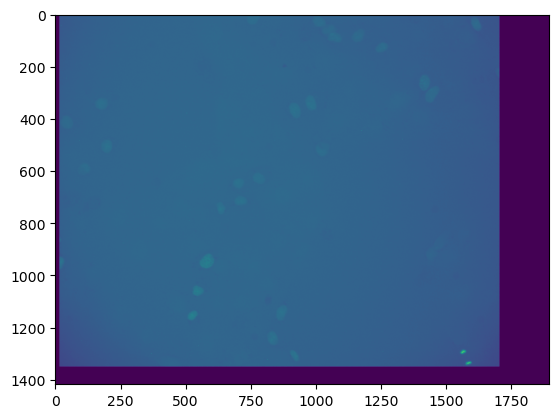

In [109]:
plt.imshow(wt_image)
plt.show()

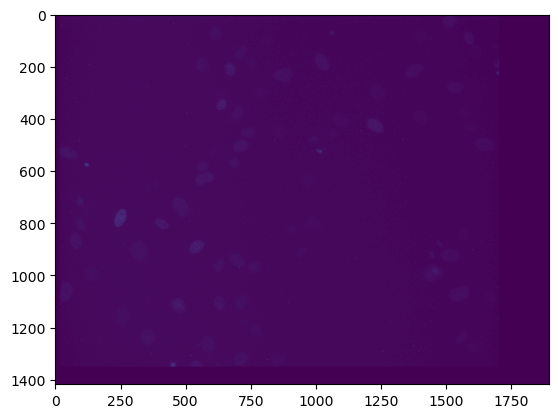

In [110]:
plt.imshow(scr_image)
plt.show()

In [46]:
wt_cell = [track for track in wt_tracks if track.ID == wt_ID][0]


In [50]:
wt_cell

,ID,t,x,y,z,parent,root,state,generation,dummy
0,86,207,945.691956,465.666656,0.0,5,5,3,1,False
1,86,208,941.123352,467.885468,0.0,5,5,3,1,False
2,86,209,943.248047,471.379852,0.0,5,5,3,1,False
3,86,210,937.126953,476.325073,0.0,5,5,3,1,False
4,86,211,934.763672,474.114441,0.0,5,5,3,1,False
5,86,212,932.009766,471.395294,0.0,5,5,2,1,False
6,86,213,927.820679,472.091370,0.0,5,5,2,1,False
7,86,214,924.331848,473.694458,0.0,5,5,0,1,False
8,86,215,923.689697,473.668030,0.0,5,5,0,1,False
9,86,216,921.618103,474.389771,0.0,5,5,0,1,False


In [60]:
wt_cell.x[wt_cell.t.index(210)]

937.126953125

In [59]:
wt_cell.t.index(210)

3

# Load experiment tracking file

In [6]:
tracks_path = os.path.join(expt_root_folder,'{}/{}/{}_aligned/HDF/segmented.hdf5'.format(expt, pos, pos))

In [7]:
tracks_path

'/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0795/Pos5/Pos5_aligned/HDF/segmented.hdf5'

In [8]:
with btrack.dataio.HDF5FileHandler(tracks_path, 'r', obj_type = "obj_type_1") as hdf:
    wt_tracks = hdf.tracks

[INFO][2021/08/31 03:34:04 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0795/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/08/31 03:34:04 PM] Loading tracks/obj_type_1
[INFO][2021/08/31 03:34:05 PM] Loading objects/obj_type_1 (83531, 5) (74420 filtered: area>=100)
[INFO][2021/08/31 03:34:06 PM] Closing HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/GV0795/Pos5/Pos5_aligned/HDF/segmented.hdf5


In [9]:
cell_ID = 86

In [10]:
[track for track in wt_tracks if track.ID == cell_ID][0]

,ID,t,x,y,z,parent,root,state,generation,dummy
0,86,207,945.691956,465.666656,0.0,5,5,3,1,False
1,86,208,941.123352,467.885468,0.0,5,5,3,1,False
2,86,209,943.248047,471.379852,0.0,5,5,3,1,False
3,86,210,937.126953,476.325073,0.0,5,5,3,1,False
4,86,211,934.763672,474.114441,0.0,5,5,3,1,False
5,86,212,932.009766,471.395294,0.0,5,5,2,1,False
6,86,213,927.820679,472.091370,0.0,5,5,2,1,False
7,86,214,924.331848,473.694458,0.0,5,5,0,1,False
8,86,215,923.689697,473.668030,0.0,5,5,0,1,False
9,86,216,921.618103,474.389771,0.0,5,5,0,1,False


In [44]:
frame = 443

48

In [ ]:
t0 = frame - 100

# Load image data

In [45]:
image_folder = os.path.join(expt_root_folder,expt, pos, pos+'_aligned')

for i in range(...):
    

# Make glimpse

In [50]:
output_dir = '/home/nathan/data/kraken/pcna/glimpses/{}/{}'.format(expt, pos)

for channel in channels:
    ### load images
    print('Loading image channel', channel)
    images = imread(os.path.join(image_folder, 'channel{}.tif'.format(channel)))
    print('Image loaded')
    ### create output directory
    output_ch_dir = os.path.join(output_dir, 'channel'+channel)
    Path(output_ch_dir).mkdir(parents=True, exist_ok=True)
    #os.mkdir(output_ch_dir) if os.path.exists(output_ch_dir) == False else print(output_ch_dir, 'already exists')
    
    for cell in tqdm(tracks):
        try:
            ### get length of track/glimpse 
            length = range(cell.t[0], cell.t[-1])
            ### get the xy coords of track/glimpse 
            y, x = cell.x, cell.y #### WHY IS THE COORDINATES TRANSPOSED???? 

            ### iterate over all frames cropping
            for j, i in enumerate(length): ## need to have something that solves skipped frames # not including the last frame bc list index out of range ie there is one more i than there
                ### obtain correct frame
                image = images[i]
                ### obtain coordinates of bounding box of glimpse (centered on cell)
                x1, x2, y1, y2 = x[j], x[j]+200, y[j], y[j]+200 #coordinates to crop by, shifted bearing in mind a further coord shift (+100,+100) occurs due to image padding            
                ### pad image incase cell goes off FOV
                image = np.pad(image, 100, 'constant', constant_values = 0) 
                ## glimpse creation by cropping original image
                glimpse = image[int(x1): int(x2), int(y1): int(y2)]
                ### fraction of track this frame is at
                age = round(i/cell.t[-1],3) 
                fn = 'cell_ID_' + str(cell.ID) + '_channel' + channel + '_t{}_age{}.tif'.format(i, age)
                ### glimpse output
                imsave(os.path.join(output_ch_dir, fn), glimpse) 
            print('cell ID',cell.ID, 'glimpse saved')
            
        except:
            print(cell.ID, 'failed to produce glimpse')


Loading image channel 003


  0%|          | 0/48 [00:00<?, ?it/s]

Image loaded


  2%|▏         | 1/48 [00:00<00:46,  1.01it/s]

cell ID 34 glimpse saved


  4%|▍         | 2/48 [00:01<00:28,  1.62it/s]

cell ID 81 glimpse saved


  6%|▋         | 3/48 [00:01<00:27,  1.62it/s]

cell ID 85 glimpse saved


  8%|▊         | 4/48 [00:02<00:24,  1.79it/s]

cell ID 273 glimpse saved


 10%|█         | 5/48 [00:02<00:20,  2.12it/s]

cell ID 393 glimpse saved


 12%|█▎        | 6/48 [00:03<00:17,  2.42it/s]

cell ID 496 glimpse saved


 15%|█▍        | 7/48 [00:03<00:14,  2.78it/s]

cell ID 499 glimpse saved


 17%|█▋        | 8/48 [00:03<00:15,  2.57it/s]

cell ID 506 glimpse saved


 19%|█▉        | 9/48 [00:04<00:14,  2.74it/s]

cell ID 541 glimpse saved


 21%|██        | 10/48 [00:04<00:14,  2.70it/s]

cell ID 563 glimpse saved


 23%|██▎       | 11/48 [00:04<00:12,  2.97it/s]

cell ID 569 glimpse saved


 25%|██▌       | 12/48 [00:05<00:12,  2.91it/s]

cell ID 605 glimpse saved


 27%|██▋       | 13/48 [00:05<00:12,  2.75it/s]

cell ID 642 glimpse saved


 29%|██▉       | 14/48 [00:05<00:11,  3.05it/s]

cell ID 674 glimpse saved


 31%|███▏      | 15/48 [00:06<00:10,  3.00it/s]

cell ID 712 glimpse saved


 33%|███▎      | 16/48 [00:06<00:10,  2.98it/s]

cell ID 721 glimpse saved


 35%|███▌      | 17/48 [00:06<00:09,  3.11it/s]

cell ID 723 glimpse saved


 38%|███▊      | 18/48 [00:07<00:11,  2.55it/s]

cell ID 745 glimpse saved


 40%|███▉      | 19/48 [00:07<00:12,  2.34it/s]

cell ID 746 glimpse saved


 42%|████▏     | 20/48 [00:08<00:10,  2.64it/s]

cell ID 760 glimpse saved


 44%|████▍     | 21/48 [00:08<00:09,  2.89it/s]

cell ID 783 glimpse saved


 46%|████▌     | 22/48 [00:08<00:09,  2.70it/s]

cell ID 789 glimpse saved


 48%|████▊     | 23/48 [00:09<00:09,  2.75it/s]

cell ID 794 glimpse saved


 50%|█████     | 24/48 [00:09<00:08,  3.00it/s]

cell ID 797 glimpse saved


 52%|█████▏    | 25/48 [00:09<00:07,  3.13it/s]

cell ID 804 glimpse saved


 54%|█████▍    | 26/48 [00:09<00:07,  3.12it/s]

cell ID 807 glimpse saved


 56%|█████▋    | 27/48 [00:10<00:07,  2.82it/s]

cell ID 774 glimpse saved


 58%|█████▊    | 28/48 [00:10<00:08,  2.40it/s]

cell ID 777 glimpse saved


 60%|██████    | 29/48 [00:11<00:07,  2.64it/s]

cell ID 780 glimpse saved


 62%|██████▎   | 30/48 [00:11<00:06,  2.64it/s]

cell ID 810 glimpse saved


 65%|██████▍   | 31/48 [00:11<00:06,  2.75it/s]

cell ID 851 glimpse saved


 67%|██████▋   | 32/48 [00:12<00:05,  2.98it/s]

cell ID 855 glimpse saved


 69%|██████▉   | 33/48 [00:12<00:06,  2.49it/s]

cell ID 871 glimpse saved


 71%|███████   | 34/48 [00:13<00:05,  2.79it/s]

cell ID 885 glimpse saved


 73%|███████▎  | 35/48 [00:13<00:04,  2.95it/s]

cell ID 904 glimpse saved


 75%|███████▌  | 36/48 [00:13<00:04,  2.95it/s]

cell ID 913 glimpse saved


 77%|███████▋  | 37/48 [00:14<00:03,  2.76it/s]

cell ID 915 glimpse saved


 79%|███████▉  | 38/48 [00:14<00:03,  2.87it/s]

cell ID 916 glimpse saved


 81%|████████▏ | 39/48 [00:14<00:02,  3.01it/s]

cell ID 956 glimpse saved


 83%|████████▎ | 40/48 [00:15<00:02,  2.84it/s]

cell ID 974 glimpse saved


 85%|████████▌ | 41/48 [00:15<00:02,  3.05it/s]

cell ID 982 glimpse saved


 88%|████████▊ | 42/48 [00:15<00:01,  3.16it/s]

cell ID 994 glimpse saved


 90%|████████▉ | 43/48 [00:15<00:01,  3.16it/s]

cell ID 1001 glimpse saved


 92%|█████████▏| 44/48 [00:16<00:01,  2.94it/s]

cell ID 1024 glimpse saved


 94%|█████████▍| 45/48 [00:16<00:00,  3.07it/s]

cell ID 1031 glimpse saved


 96%|█████████▌| 46/48 [00:16<00:00,  3.27it/s]

cell ID 1041 glimpse saved


 98%|█████████▊| 47/48 [00:17<00:00,  3.44it/s]

cell ID 1046 glimpse saved


100%|██████████| 48/48 [00:17<00:00,  2.76it/s]

cell ID 1088 glimpse saved


# Iterate over many positions

In [23]:
expt_root_folder = '/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Manasi/'

In [58]:
expt = 'MK0000'
pos_list = natsorted([pos for pos in os.listdir(os.path.join(expt_root_folder, expt)) if 'Pos' in pos])

In [14]:
channels = ['003'] ### bf 000 gfp 001 rfp 002 irfp 003

focal_time_range = (0, 800) ### this particular expt stays in focus in this time range

# Load experiment tracking file

In [59]:
for pos in pos_list:
    print('starting', pos)
    tracks_path = os.path.join(expt_root_folder,'{}/{}/gfp_tracks.h5'.format(expt, pos))

    with btrack.dataio.HDF5FileHandler(tracks_path, 'r', obj_type = "obj_type_1") as hdf:
        wt_tracks = hdf.tracks

    ### filter tracks that should contain a full cell cycle in (1 timepoint/frame = 4min, cc time approx 200 frames based on quick look)
    long_tracks = [track for track in wt_tracks if len(track) > 200]

    ### filter tracks that spend a lot of time out of focus
    tracks = [track for track in long_tracks if track.t[-1] < focal_time_range[1]]

    ### show number of filtered tracks
    print('number of glimpses to be generated:', len(tracks))

    ### find images and set output
    image_folder = os.path.join(expt_root_folder,expt, pos, pos+'_stacks')
    output_dir = '/home/nathan/data/kraken/pcna/glimpses/{}/{}'.format(expt, pos)

    for channel in channels:
        ### load images
        print('Loading image channel', channel)
        images = imread(os.path.join(image_folder, 'channel{}.tif'.format(channel)))
        print('Image loaded')
        ### create output directory
        output_ch_dir = os.path.join(output_dir, 'channel'+channel)
        Path(output_ch_dir).mkdir(parents=True, exist_ok=True)
        #os.mkdir(output_ch_dir) if os.path.exists(output_ch_dir) == False else print(output_ch_dir, 'already exists')

        for cell in tqdm(tracks):
            try:
                ### get length of track/glimpse 
                length = range(cell.t[0], cell.t[-1])
                ### get the xy coords of track/glimpse 
                y, x = cell.x, cell.y #### WHY IS THE COORDINATES TRANSPOSED???? 

                ### iterate over all frames cropping
                for j, i in enumerate(length): ## need to have something that solves skipped frames # not including the last frame bc list index out of range ie there is one more i than there
                    ### obtain correct frame
                    image = images[i]
                    ### obtain coordinates of bounding box of glimpse (centered on cell)
                    x1, x2, y1, y2 = x[j], x[j]+200, y[j], y[j]+200 #coordinates to crop by, shifted bearing in mind a further coord shift (+100,+100) occurs due to image padding            
                    ### pad image incase cell goes off FOV
                    image = np.pad(image, 100, 'constant', constant_values = 0) 
                    ## glimpse creation by cropping original image
                    glimpse = image[int(x1): int(x2), int(y1): int(y2)]
                    ### fraction of track this frame is at
                    age = round(i/cell.t[-1],3) 
                    fn = 'cell_ID_' + str(cell.ID) + '_channel' + channel + '_t{}_age{}.tif'.format(i, age)
                    ### glimpse output
                    imsave(os.path.join(output_ch_dir, fn), glimpse) 
                print('cell ID',cell.ID, 'glimpse saved')

            except:
                print(cell.ID, 'failed to produce glimpse')


[INFO][2021/05/21 02:28:28 PM] Opening HDF file: /run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Manasi/MK0000/Pos0/gfp_tracks.h5...


starting Pos0


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Manasi/MK0000/Pos0/gfp_tracks.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

# old method (needs a rewrite)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, re
from scipy import ndimage
from skimage.io import imshow, imsave, imread #used to be from skimage import io
from sklearn import preprocessing
from matplotlib import animation
from natsort import natsorted
from pathlib import Path
#from skimage.external import tifffile
import tifffile
from btrack.dataio import HDF5FileHandler
import glob
from tensorflow.python.keras.models import Model, load_model
import json
import zipfile
import scipy
from scipy.spatial import KDTree
from skimage.transform import resize
from multiprocessing import Pool
from skimage.external import tifffile
import warnings
warnings.filterwarnings('ignore')

### Tiff virtual stack functions

In [ ]:
class VirtualTiffStack:
    def __init__(self, folder, channel_name):
        self.folder = folder 
        self.channel_name = channel_name
        # find the files and store them
        self.files = natsorted([file for file in os.listdir(os.path.join(self.folder, self.channel_name)) if file.endswith('.tif')])
        self.glimpse = [] ### would this work like this?????
    def __getitem__(self, idx):
        return tifffile.imread(os.path.join(self.folder, self.channel_name, self.files[idx]))
    def __len__(self):
        return len(self.files) ### what this do?

def str_convert(string): 
    li = list(string.split(", ")) 
    return li 

### Directory definitions

In [ ]:
mask_version = 'cellpose_nuclear_3'
#mask_version = 'cellpose_nuclear'
path = '/home/nathan/data/SHARC/fucci/fucci1_171201/'
path = '/home/nathan/data/kraken/fucci/2017_10_18/pos16'
gfp_stack = VirtualTiffStack(path, channel_name = 'gfp')
rfp_stack = VirtualTiffStack(path, channel_name = 'rfp')
channels = ['gfp', 'rfp']#, 'phase']
glimpses_folder = os.path.join(path,'glimpses')
Path(glimpses_folder).mkdir(parents=True, exist_ok=True) ## create glimpse folder
if 'phase' in channels: ## this just adds a phase channel for sharc data
    phase_stack = VirtualTiffStack(path, channel_name = 'phase')

### Load tracking data

In [ ]:
tracks_file = path+'/tracks/'+ mask_version + '.h5' ### should it be hdf5?
with HDF5FileHandler(tracks_file) as h:
    tracks = h.tracks[0] ### only loading 'WT' cells at the moment, hence h.tracks[0]
track_IDs = natsorted([track.ID for track in tracks]) #if len(track) > 400]) does this criterion mess with trackID indexing?
#print(track_IDs) ### CAN PUT CRITERION HERE ### for finding tracks of only certain length etc

In [ ]:
for i, j in enumerate(tracks):
    print(i, tracks[i].ID, "ID length is", len(tracks[i]))

# Glimpse rgb composite creation

In [ ]:
print("Input cell ID") ### prompt for which cell(s) you want glimpses for
cells=str_convert(input())
for cell in cells:
    print('Cell ID', cell, 'START')
    track = tracks[[i for i, j in enumerate(tracks) if tracks[i].ID == int(cell)][0]] #this list comprehension correctly picks out the index of the track of track_ID = cell
    t, x, y = track.t, track.x, track.y
    t = range(min(t),len(t)) ### i believe this solves the skipped frame dilemma by redefining t as being continous in the range of t, as xy are continous??? 
    glimpse_folder = os.path.join(glimpses_folder, 'cell_ID_'+ cell) ## glimpse(not plural) folder for individual cell glimpse
    Path(glimpse_folder).mkdir(parents=True, exist_ok=True) ## create glimpse folder

    for channel in channels: 
        
        channel_folder = os.path.join(glimpse_folder, channel)
        Path(channel_folder).mkdir(parents=True, exist_ok=True) ## create channel folder
        if channel == 'phase': 
            images = phase_stack#[i]
        if channel == 'gfp': 
            images = gfp_stack#[i]   ### select relevant channel image stack
        if channel == 'rfp': 
            images = rfp_stack#[i]
        for j, i in enumerate(t): ## need to have something that solves skipped frames # not including the last frame bc list index out of range ie there is one more i than there
            image = images[i]
            x1, x2, y1, y2 = x[j], x[j]+200, y[j], y[j]+200 #coordinates to crop by, shifted bearing in mind a further coord shift (+100,+100) occurs due to image padding            
            image = np.pad(image, 100, 'constant', constant_values = 0) 
            glimpse = image[int(x1): int(x2), int(y1): int(y2)] ## glimpse creation by cropping original image
            fn = 'cell_ID_' + cell + '_' + channel + '_t{}.tif'.format(i)
            imsave(os.path.join(channel_folder, fn), glimpse) ### glimpse output
        print(channel, 'glimpse saved')
    #print('Glimpse cell_ID ', cell, ' saved')

    gfp_list = natsorted([m for m in os.listdir(os.path.join(glimpse_folder, 'gfp')) if m.endswith('.tif')]) # collect images
    rfp_list = natsorted([m for m in os.listdir(os.path.join(glimpse_folder, 'rfp')) if m.endswith('.tif')])
    for green, red in zip(gfp_list, rfp_list): 
        image_g = imread(os.path.join(glimpse_folder, 'gfp', green)).astype('uint16')
        image_r = imread(os.path.join(glimpse_folder, 'rfp', red)).astype('uint16')
        M, N = image_g.shape
        rgb = np.zeros((M,N,3), dtype = 'uint16') #creating an zero matrix of MxNx3 to hold the rgb images
        rgb[:,:,0] = image_r
        rgb[:,:,1] = image_g

        rgb_output_dir = os.path.join(glimpse_folder, 'rgb')
        Path(rgb_output_dir).mkdir(parents=True, exist_ok=True)
        fn = green.replace('gfp','rgb')
        imsave(os.path.join(rgb_output_dir, fn), rgb)
    stack_fn = 'Cell_ID_' + cell + '_rgb.tif'
    with tifffile.TiffWriter(os.path.join(glimpse_folder, stack_fn)) as stack: #output path
        file_list = natsorted([file for file in os.listdir(rgb_output_dir) if file.endswith('.tif')])
        for filename in file_list:
            stack.save(tifffile.imread(os.path.join(rgb_output_dir, filename)))
        print(stack_fn, "SAVED AS TIFF STACK")

# Glimpse creation

In [ ]:
print("Input cell ID") ### prompt for which cell(s) you want glimpses for
cells=str_convert(input())
for cell in cells:
    track = tracks[[i for i, j in enumerate(tracks) if tracks[i].ID == int(cell)][0]] #this list comprehension correctly picks out the index of the track of track_ID = cell
    t, x, y = track.t, track.x, track.y
    t = range(min(t),len(t)) ### i believe this solves the skipped frame dilemma by redefining t as being continous in the range of t, as xy are continous??? 
    glimpse_folder = os.path.join(glimpses_folder, 'cell_ID_'+ cell) ## glimpse(not plural) folder for individual cell glimpse
    Path(glimpse_folder).mkdir(parents=True, exist_ok=True) ## create glimpse folder

    for channel in channels: 
        channel_folder = os.path.join(glimpse_folder, channel)
        Path(channel_folder).mkdir(parents=True, exist_ok=True) ## create channel folder
        if channel == 'phase': 
            images = phase_stack#[i]
        if channel == 'gfp': 
            images = gfp_stack#[i]   ### select relevant channel image stack
        if channel == 'rfp': 
            images = rfp_stack#[i]
        for j, i in enumerate(t): ## need to have something that solves skipped frames # not including the last frame bc list index out of range ie there is one more i than there
            image = images[i]
            x1, x2, y1, y2 = x[j], x[j]+200, y[j], y[j]+200 #coordinates to crop by, shifted bearing in mind a further coord shift (+100,+100) occurs due to image padding
            image = np.pad(image, 100, 'constant', constant_values = 0) 
            glimpse = image[int(x1): int(x2), int(y1): int(y2)] ## glimpse creation by cropping original image
            fn = 'cell_ID_' + cell + '_' + channel + '_t{}.tif'.format(i)
            imsave(os.path.join(channel_folder, fn), glimpse) ### glimpse output
    print('Glimpse cell_ID ', cell, ' saved')

# Make rgb composite

In [ ]:
print("Input cell ID") ### prompt for which cell(s) you want glimpses for
cell=(input())
glimpse_folder = os.path.join(glimpses_folder, 'cell_ID_'+ cell) ## glimpse(not plural) folder for individual cell glimpse
gfp_list = natsorted([m for m in os.listdir(os.path.join(glimpse_folder, 'gfp')) if m.endswith('.tif')])
rfp_list = natsorted([m for m in os.listdir(os.path.join(glimpse_folder, 'rfp')) if m.endswith('.tif')])
for green, red in zip(gfp_list, rfp_list): 
    image_g = imread(os.path.join(glimpse_folder, 'gfp', green)).astype('uint16')
    image_r = imread(os.path.join(glimpse_folder, 'rfp', red)).astype('uint16')
    if skipped_frames == True: 
        if image_g.max() != 255: 
            image_g = np.ones(image_g.shape)
            print(green, 'turned to ones')
        if image_r.max() != 255: 
            image_r = np.ones(image_r.shape)
            print(red, 'turned to ones')
    M, N = image_g.shape
    rgb = np.zeros((M,N,3), dtype = 'uint16') #creating an zero matrix of MxNx3 to hold the rgb images
    rgb[:,:,0] = image_r
    rgb[:,:,1] = image_g

    rgb_output_dir = os.path.join(glimpse_folder, 'rgb')
    Path(rgb_output_dir).mkdir(parents=True, exist_ok=True)
    fn = green.replace('gfp','rgb')
    imsave(os.path.join(rgb_output_dir, fn), rgb)
stack_fn = 'Cell_ID_' + cell + '_rgb.tif'
with tifffile.TiffWriter(os.path.join(glimpse_folder, stack_fn)) as stack: #output path
    file_list = natsorted([file for file in os.listdir(rgb_output_dir) if file.endswith('.tif')])
    for filename in file_list:
        stack.save(tifffile.imread(os.path.join(rgb_output_dir, filename)))
    print(stack_fn, "SAVED AS TIFF STACK")

# Legacy glimpse creation and output as composite TIFF with no padding

In [ ]:
print("Input cell ID") ### prompt for which cell(s) you want glimpses for
cells=str_convert(input())
for cell in cells:
    track = tracks[[i for i, j in enumerate(tracks) if tracks[i].ID == int(cell)][0]] #this list comprehension correctly picks out the index of the track of track_ID = cell
    t, x, y = track.t, track.x, track.y
    t = range(min(t),len(t)) ### i believe this solves the skipped frame dilemma by redefining t as being continous in the range of t, as xy are continous??? 
    glimpse_folder = os.path.join(glimpses_folder, 'cell_ID_'+ cell) ## glimpse(not plural) folder for individual cell glimpse
    Path(glimpse_folder).mkdir(parents=True, exist_ok=True) ## create glimpse folder

    for channel in channels: 
        print(channel)
        channel_folder = os.path.join(glimpse_folder, channel)
        Path(channel_folder).mkdir(parents=True, exist_ok=True) ## create channel folder
        if channel == 'phase': 
            images = phase_stack#[i]
        if channel == 'gfp': 
            images = gfp_stack#[i]   ### select relevant channel image stack
        if channel == 'rfp': 
            images = rfp_stack#[i]
        for j, i in enumerate(t): ## need to have something that solves skipped frames # not including the last frame bc list index out of range ie there is one more i than there
            image = images[i]
            x1, x2, y1, y2 = x[j]-100, x[j]+100, y[j]-100, y[j]+100 #coordinates to crop by 
            if x1 < 0:
                x1 = 0
            if x2 < 0:
                x2 = 0   ### this just crops the glimpse further if the ROI coordinates go negative
            if y1 < 0:
                y1 = 0
            if y2 < 0:
                y2 = 0
                
            #add image padding here
            image = np.pad(image, 100, 'constant', constant_values = 0) 

            glimpse = image[int(x1): int(x2), int(y1): int(y2)] ## glimpse creation by cropping original image
            fn = 'cell_ID_' + cell + '_' + channel + '_t{}.tif'.format(i)
            imsave(os.path.join(channel_folder, fn), glimpse) ### glimpse output
    print('Glimpse cell_ID ', cell, ' saved')

    gfp_list = natsorted([m for m in os.listdir(os.path.join(glimpse_folder, 'gfp')) if m.endswith('.tif')]) # collect images
    rfp_list = natsorted([m for m in os.listdir(os.path.join(glimpse_folder, 'rfp')) if m.endswith('.tif')])
    for green, red in zip(gfp_list, rfp_list): 
        image_g = imread(os.path.join(glimpse_folder, 'gfp', green))
        image_r = imread(os.path.join(glimpse_folder, 'rfp', red))

        if image_g.max() != 255: 
            image_g = np.ones(image_g.shape) # these conditionals put dummy images in blank frames
        if image_r.max() != 255: 
            image_r = np.ones(image_r.shape)

        imshow(image_g, cmap = 'Greens')
        imshow(image_r, cmap = 'Reds', alpha = 0.5)
        rgb_output_dir = os.path.join(glimpse_folder, 'rgb') # this block saves out the individual composite frames
        Path(rgb_output_dir).mkdir(parents=True, exist_ok=True)
        fn = green.replace('gfp','rgb')
        plt.savefig(os.path.join(rgb_output_dir, fn))

    stack_fn = 'Cell_ID_' + cell + '_rgb.tif'
    with tifffile.TiffWriter(os.path.join(glimpse_folder, stack_fn)) as stack: # this block merges the composites frames into a stacked tiff
        file_list = natsorted([file for file in os.listdir(rgb_output_dir) if file.endswith('.tif')])
        for filename in file_list:
            stack.save(tifffile.imread(os.path.join(rgb_output_dir, filename)))
        print(stack_fn, "saved as tiff stack")

# sandbox
to do: 
- ~glimpse padding~
- ~rgb composite~

In [ ]:
green = gfp_list[0]
red = rfp_list[0]
image_g = imread(os.path.join(glimpse_folder, 'gfp', green)).astype('uint16')
image_r = imread(os.path.join(glimpse_folder, 'rfp', red)).astype('uint16')
print(green)
print(type(image_g[100,100]))
imshow(image_r)#

In [ ]:

image_g = imread('gfp.tif').astype('uint16') # green image
image_r = imread('rfp.tif').astype('uint16') # red image
M, N = image_r.shape
rgb = np.zeros((M,N,3), dtype = 'uint16')   # empty rgb image of MxNx3 dimenesions
rgb[:,:,0] = image_r                        #add the red image to the MxNx0th (red) channel 
rgb[:,:,1] = image_g                        #add the green image to the MxNx1st (green) channel
imshow(rgb)
imsave('rgb.tif', rgb)